<h1 align="center">NLP-Final Project-Amazon Reviews</h1>

### Ön Bilgi

**Problem Açıklaması:** Amazon İncelemelerini NLP Kullanarak Müşteri Derecelendirmelerine Göre Sınıflandırma
Bu bölümde, projenin temel amacı açıklanıyor. Problemin özeti, müşteri derecelendirmelerine dayalı olarak Amazon incelemelerini sınıflandırmaktır. Burada amaç, inceleme metninin anlamına dayalı olarak en uygun derecelendirmeyi atayacak bir sınıflandırıcı oluşturmaktır. Yani, inceleme metninin içeriğini anlayan bir sınıflandırıcı geliştirmek hedeflenmektedir.

**Etki:**
Müşteri incelemeleri ürünlere objektif geri bildirim sağlar ve bu nedenle tüketiciler için önemlidir. Bu derecelendirmeler genellikle sayısal bir derecelendirme veya yıldız sayısı olarak özetlenir. Ancak, gerçek metin içeriğinde sayılardan daha fazla değer bulunmaktadır. Bazen verilen derecelendirme ürün deneyimini tam olarak iletemeyebilir - geri bildirimin özü aslında metin içeriğinde bulunur. Bu nedenle amaç, bir inceleme parçasının özünü anlayacak ve metin anlamına dayalı olarak en uygun derecelendirmeyi atayacak bir sınıflandırıcı oluşturmaktır.

**Arkaplan:**
Amazon'daki ürün derecelendirmeleri, her müşterinin tüm incelemelerinden toplandığından, her bir bireysel derecelendirme aslında bir yıldızdan beş yıldıza kadar değişen bir tamsayıdır. Bu, tahminlerimizi toplam beş olasılığa sahip ayrık sınıflara indirir. Bu nedenle, temel tahminci olarak gerçek inceleme metnini kullanan gözetimli çok sınıflı bir sınıflandırıcıya sahip olacağız.
Bu çalışma, Doğal Dil İşleme (NLP) alanının bir keşfidir. Bir metin parçasının verilen yıldız derecesini tahmin etme amacı, kelime gömme, konu modellemesi ve boyut indirgeme gibi farklı NLP konularını içerecektir. Buradan hareketle, son bir veri çerçevesine ulaşacağız ve sınıflandırıcımız için en iyi yaklaşımı (en doğru tahminci) bulmak için farklı makine öğrenimi tekniklerini kullanacağız.

**Veri Kümeleri:**
Amazon veri seti, Mayıs 1996'dan Temmuz 2014'e kadar olan tüm listelenen Elektronik ürünlerinin müşteri incelemelerini içerir. Toplamda 1.689.188 inceleme bulunmaktadır ve bunlar 63.001 benzersiz ürün üzerinde 192.403 müşteri tarafından yapılmıştır. Veri sözlüğü aşağıdaki gibidir:

**asin:** İncelenen ürünün benzersiz kimliği, dize

**helpful:** Yardımcı olan kullanıcıların sayısı ve incelemeye oy veren toplam kullanıcı sayısı (yardımcı olmayan oylar dahil), liste

**overall:** İnceleyenin ürüne verdiği puan, int64

**reviewText:** İnceleme metni, dize

**reviewerID:** İncelemeyi yapan kişinin benzersiz kimliği, dize

**reviewerName:** İncelemeyi yapan kişinin belirtilen adı, dize

**summary:** İncelemenin başlık özeti, dize

**unixReviewTime:** İncelemenin ne zaman gönderildiğinin Unix zamanı, dize
Bu açıklamalar, NLP tabanlı bir proje bağlamında yapılan çalışmanın genel anlayışını ve amaçlarını özetlemektedir.

<img src="amazon_reviews.png">

### Veri Düzenleme
Bu bölümde, projenin veri düzenleme ve işleme aşamalarını anlatmaktadır.
Öncelikle, gereksiz uyarıları kapatmak için "warnings" modülü kullanılarak uyarmalar engellenir:

In [16]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

Veri kümesi, "Electronics_5.json" adında bir dosyadan okunmaya çalışılır. Eğer bu dosya mevcutsa, veri çerçevesi ("df") bu dosyadan okunur. Aksi takdirde, veri çerçevesi internetten indirilen bir JSON dosyasından yüklenir:

In [17]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


Belirlenen adresten çekilen veriler "csv" dosyasına kaydedilir:

In [18]:
df.to_csv("amazon.csv")

Kaydedilen veri okunur:

In [19]:
df=pd.read_csv("amazon.csv")

Merkezi Limit Teoremi (Central Limit Theorem), istatistikte önemli bir kavramdır ve birçok rastgele değişkenin toplamının veya ortalamasının, bağımsız ve aynı dağılıma sahip rastgele değişkenlerin örneklemlerinin ortalamasına yakınsadığını belirtir. Kısacası, büyük bir örneklemin ortalaması normal dağılıma daha yakın olacaktır.

Merkezi Limit Teoremi, bir popülasyonun dağılım şeklinin ne olursa olsun, yeterince büyük bir örneklem alındığında, örneklemin ortalamasının yaklaşık olarak normal dağılıma sahip olduğunu ifade eder. Bu, istatistiksel analizde birçok kez kullanılan ve sonuçların genellenmesine yardımcı olan önemli bir teorem olarak kabul edilir.

"CLT (Central Limit Theoerem)'e göre veri milyonlara ulaştığından sadece 400.000 i ile çalışmak istatiksel olarak yeterli olacak:

In [20]:
df=df.sample(400000)

Bu kod, Google Colab (Colaboratory) ortamında kullanıldığında, belirtilen dosyanın indirilmesini sağlar. files.download() fonksiyonu, Colab ortamında çalışırken oluşturulan veya işlenen bir dosyanın kullanıcıya indirilmesini sağlar.

In [21]:
from google.colab import files
files.download("amazon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Veri setinin bellek kullanımı ve sütun türleri "info()" fonksiyonuyla görüntülenir:

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 119235 to 1374754
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      400000 non-null  int64 
 1   reviewerID      400000 non-null  object
 2   asin            400000 non-null  object
 3   reviewerName    394070 non-null  object
 4   helpful         400000 non-null  object
 5   reviewText      399755 non-null  object
 6   overall         400000 non-null  int64 
 7   summary         399999 non-null  object
 8   unixReviewTime  400000 non-null  int64 
 9   reviewTime      400000 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.6+ MB
None


In [23]:
!ls -al

total 1234540
drwxr-xr-x 1 root root       4096 Aug 18 11:47 .
drwxr-xr-x 1 root root       4096 Aug 18 11:45 ..
-rw-r--r-- 1 root root 1264147732 Aug 18 13:10 amazon.csv
drwxr-xr-x 4 root root       4096 Aug 16 13:41 .config
drwxr-xr-x 1 root root       4096 Aug 16 13:42 sample_data


In [24]:
dir

<function dir>

Unix zaman damgaları ("unixReviewTime"), daha sezgisel bir veri türü olan tarih ve saat nesnelerine dönüştürülür:

In [25]:
import datetime

condition = lambda row: datetime.datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

Gereksiz olan "reviewTime" sütunu veri çerçevesinden çıkarılır:

In [26]:
df.drop(labels="reviewTime", axis=1, inplace=True)

display(df.head())

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
119235,119235,A212K1K7634N4H,B0002U1TJY,h0tw1r3,"[2, 3]",Over the past month I have tried 3 different E...,2,You get what you pay for,09-05-2013
1558008,1558008,A3LHACAJED582U,B00BEJDGOS,ParttimeGamer,"[0, 0]",High quality and comes with excellent extras! ...,5,Excellent!,03-28-2014
175693,175693,A3K6DS5E7T0N0L,B000BQ7GW8,Corky,"[0, 0]",I trust the SanDisk name but I was worried bec...,4,Good HC card.,02-24-2013
1311351,1311351,A3PWNBC2DP6TW3,B007MH75J8,Octopusrex,"[0, 0]",Bought this to power the Micro LED lights used...,3,Works...what can I say?,01-18-2014
763402,763402,ADOR3TR7GDF68,B003EO1H7E,F T. A.,"[0, 0]",Without a doubt the best USB Flash Drive I hav...,5,best USB Flash Drive,02-23-2012


Veri çerçevesinde örnek bir yorum yazısı görüntülenir:

In [27]:
print(df["reviewText"].iloc[9])

Ok, usually these third party lens caps are much worse than the original cap but in this case I actually prefer this cap to my original Panasonic cap! I lost my cap for the Panasonic 20mm f/1.7 somewhere on my last trip so I needed a replacement, and this pinch cap is a much more snug fit and also lower profile. Whereas the Panasonic cap bulged out a bit in a curved bubble design, this cap is flat and slim, perfect for the Micro 4/3 lenses. Also, I like the front cap being unlabeled and not displaying the logo. I didn't think I could write so much about a lens cap but this one is great!


Son olarak, veri seti "overall" sütunundaki unique derecelendirmeleri görüntülemek için kullanılır:

In [28]:
print(df["overall"].unique())

[2 5 4 3 1]




```
# Bu, kod olarak biçimlendirilmiştir
```

Görsel olarak görmek istediğimizde:

<Axes: >

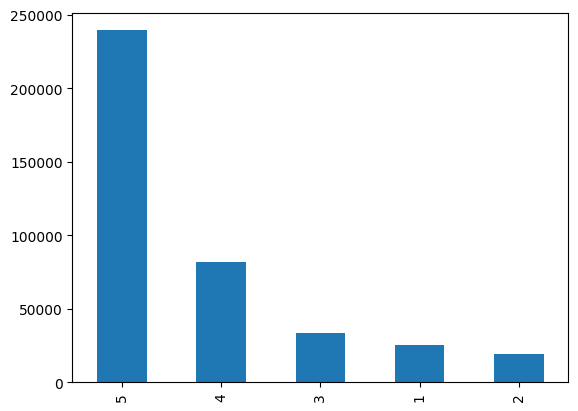

In [29]:
df.overall.value_counts().plot.bar()

NLP Proje öncesi yapılması gerekenler
#### 1-Yazıdaki tüm harfleri küçük harfe çevir
#### 2-Noktalama işaretlerini kaldır
#### 3-Rakamları kaldır
#### 4-Satır sonlarını kaldır
#### 5-Gereksiz kelimeleri çıkart (Stopwords)
#### 6-Tokenize et
#### 7-Ekleri kaldır, kökleri bul (Lemma&Stemma)
#### 8-Vektörize et

In [32]:
# Rastgele aldıklarımız
s_review = df["reviewText"].iloc[399999]
print(s_review)

I am a fan of this little lens - it's been on my camera non-stop since receiving it and I've gotten some great pictures out of it. Including some excellent portrait shots. (fyi, I shoot on both a full frame and a crop sensor). On the full frame, I do notice the slight vignetting that everyone talks about, but it's not a big deal. On the crop sensor - I wish it was a bit wider - it's 64mm equivalent.It's a great price and image quality is really fantastic. I don't notice the noise that some people complain about - yes, you can hear it if you try, but when I'm shooting, I'm in the zone and I can't recall being bothered by it, or even noticing it while shooting for that matter. Order it - you won't regret it.


In [33]:
#Html eklentileri çıkar
import html

dec_review = html.unescape(s_review)
print(dec_review)

I am a fan of this little lens - it's been on my camera non-stop since receiving it and I've gotten some great pictures out of it. Including some excellent portrait shots. (fyi, I shoot on both a full frame and a crop sensor). On the full frame, I do notice the slight vignetting that everyone talks about, but it's not a big deal. On the crop sensor - I wish it was a bit wider - it's 64mm equivalent.It's a great price and image quality is really fantastic. I don't notice the noise that some people complain about - yes, you can hear it if you try, but when I'm shooting, I'm in the zone and I can't recall being bothered by it, or even noticing it while shooting for that matter. Order it - you won't regret it.


In [34]:
#Noktalamaları kaldır
pattern = r"\&\#[0-9]+\;"
df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)
print(df["preprocessed"].iloc[399999])

I am a fan of this little lens - it's been on my camera non-stop since receiving it and I've gotten some great pictures out of it. Including some excellent portrait shots. (fyi, I shoot on both a full frame and a crop sensor). On the full frame, I do notice the slight vignetting that everyone talks about, but it's not a big deal. On the crop sensor - I wish it was a bit wider - it's 64mm equivalent.It's a great price and image quality is really fantastic. I don't notice the noise that some people complain about - yes, you can hear it if you try, but when I'm shooting, I'm in the zone and I can't recall being bothered by it, or even noticing it while shooting for that matter. Order it - you won't regret it.


In [36]:
pip install nltk

In [38]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
df["reviewText"]=df["reviewText"].str.lower() #küçük harfe çevrildi
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["reviewText"]=df["reviewText"].str.replace("\d+","") #d digit rakamları kaldırır
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [62]:
df.loc[df["overall"]==3,"sentimentOverall"]="neutral"
df.loc[df["overall"]<3,"sentimentOverall"]="negative"
df.loc[df["overall"]>3,"sentimentOverall"]="positive"

<Axes: >

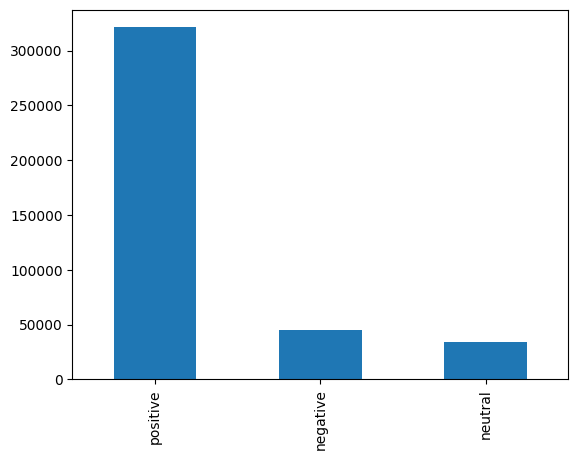

In [63]:
df["sentimentOverall"].value_counts().plot.bar()

In [42]:
from unicodedata import normalize
df["reviewText"]=df["reviewText"].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))
#Aksanları ortadan kaldırdık

In [46]:
# Lang Detect
!pip install langdetect
from langdetect import detect
df['language']=df["reviewText"].apply(detect)
df=df[df['language']=='en']
df

LangDetectException: ignored

In [48]:
# 5-Gereksiz kelimeleri çıkart (Stopwords)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df["reviewText"]=df["reviewText"].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
# 6-Tokenize et
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df["reviewText"].values]

In [51]:
# 7-Ekleri kaldır, kökleri bul (Lemma&Stemma)
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df["reviewText"].values]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [52]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [53]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [54]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [55]:
df.loc[df['subjectivity']>0.5,'sentimentPolarity']="positive" #positive
df.loc[df['subjectivity']==0.5,'sentimentPolarity']="neutral" #neutral
df.loc[df['subjectivity']<0.5,'sentimentPolarity']="negative" #negative
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,preprocessed,tokenized,lemmatize,polarity,subjectivity,sentimentPolarity
119235,119235,A212K1K7634N4H,B0002U1TJY,h0tw1r3,"[2, 3]",past month tried different elite screens manu...,2,You get what you pay for,09-05-2013,Over the past month I have tried 3 different E...,"[past, month, tried, different, elite, screens...","[p, a, s, t, , m, o, n, t, h, , t, r, i, e, ...",0.028125,0.542708,positive
1558008,1558008,A3LHACAJED582U,B00BEJDGOS,ParttimeGamer,"[0, 0]",high quality comes excellent extras far best ...,5,Excellent!,03-28-2014,High quality and comes with excellent extras! ...,"[high, quality, comes, excellent, extras, far,...","[h, i, g, h, , q, u, a, l, i, t, y, , c, o, ...",0.565000,0.710000,positive
175693,175693,A3K6DS5E7T0N0L,B000BQ7GW8,Corky,"[0, 0]",trust sandisk name worried hcsd never noticed ...,4,Good HC card.,02-24-2013,I trust the SanDisk name but I was worried bec...,"[trust, sandisk, name, worried, hcsd, never, n...","[t, r, u, s, t, , s, a, n, d, i, s, k, , n, ...",0.400000,0.400000,negative
1311351,1311351,A3PWNBC2DP6TW3,B007MH75J8,Octopusrex,"[0, 0]",bought power micro led lights used light inter...,3,Works...what can I say?,01-18-2014,Bought this to power the Micro LED lights used...,"[bought, power, micro, led, lights, used, ligh...","[b, o, u, g, h, t, , p, o, w, e, r, , m, i, ...",0.400000,0.700000,positive
763402,763402,ADOR3TR7GDF68,B003EO1H7E,F T. A.,"[0, 0]",without doubt best usb flash drive ever purcha...,5,best USB Flash Drive,02-23-2012,Without a doubt the best USB Flash Drive I hav...,"[without, doubt, best, usb, flash, drive, ever...","[w, i, t, h, o, u, t, , d, o, u, b, t, , b, ...",0.833333,0.366667,negative


<Axes: >

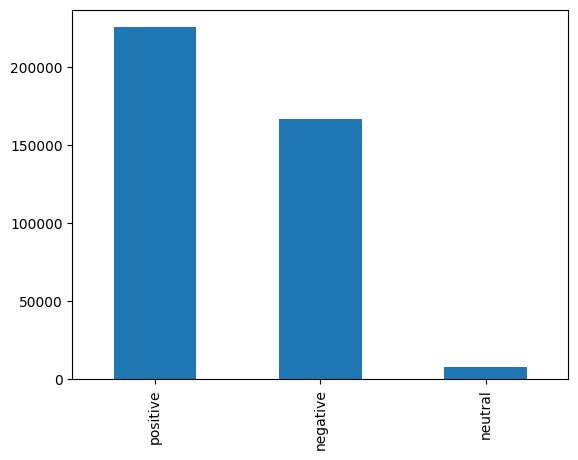

In [57]:
df["sentimentPolarity"].value_counts().plot(kind="bar")

In [59]:
### WORDCLOUD
!pip install wordcloud

In [60]:
from wordcloud import WordCloud

In [72]:
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

In [73]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [74]:
possitive_data_overall_sentiment=df[df["sentimentOverall"]=="positive"]["reviewText"]
negative_data_overall_sentiment=df[df["sentimentOverall"]=="negative"]["reviewText"]
neutral_data_overall_sentiment=df[df["sentimentOverall"]=="neutral"]["reviewText"]

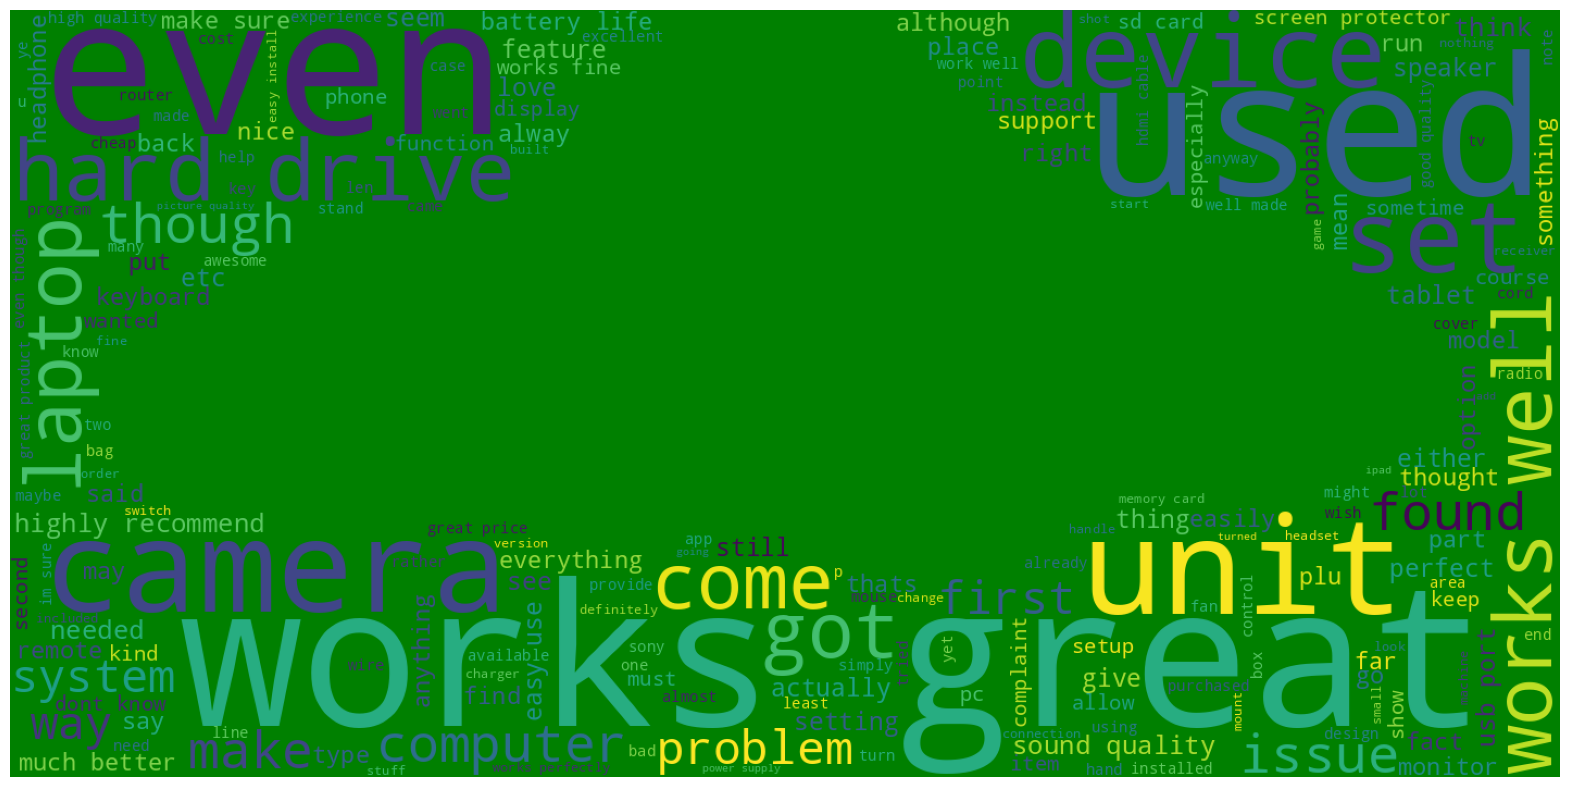

In [75]:
wc(possitive_data_overall_sentiment,"green")

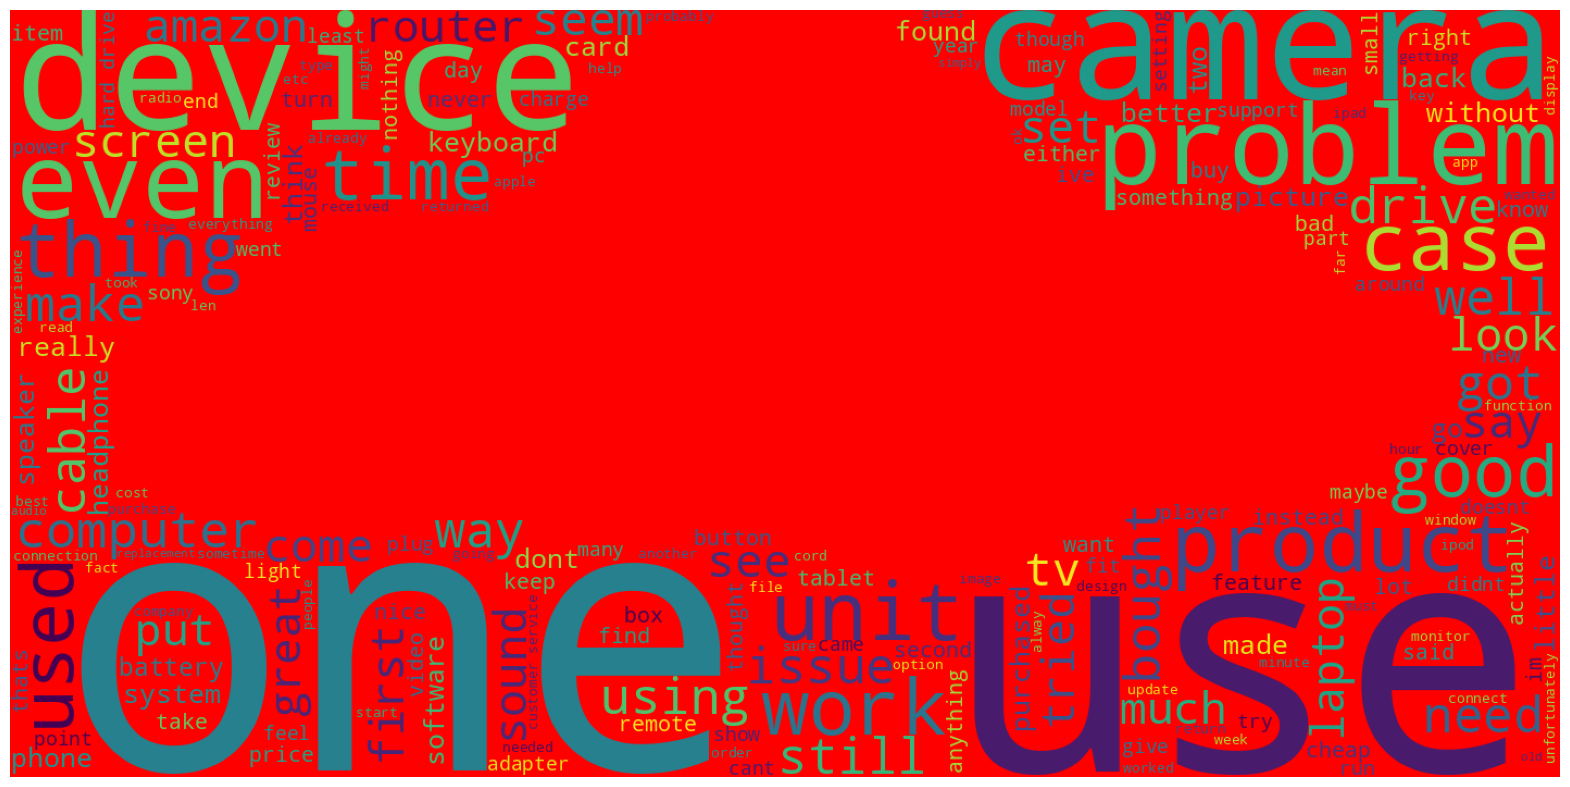

In [76]:
wc(negative_data_overall_sentiment,"red")

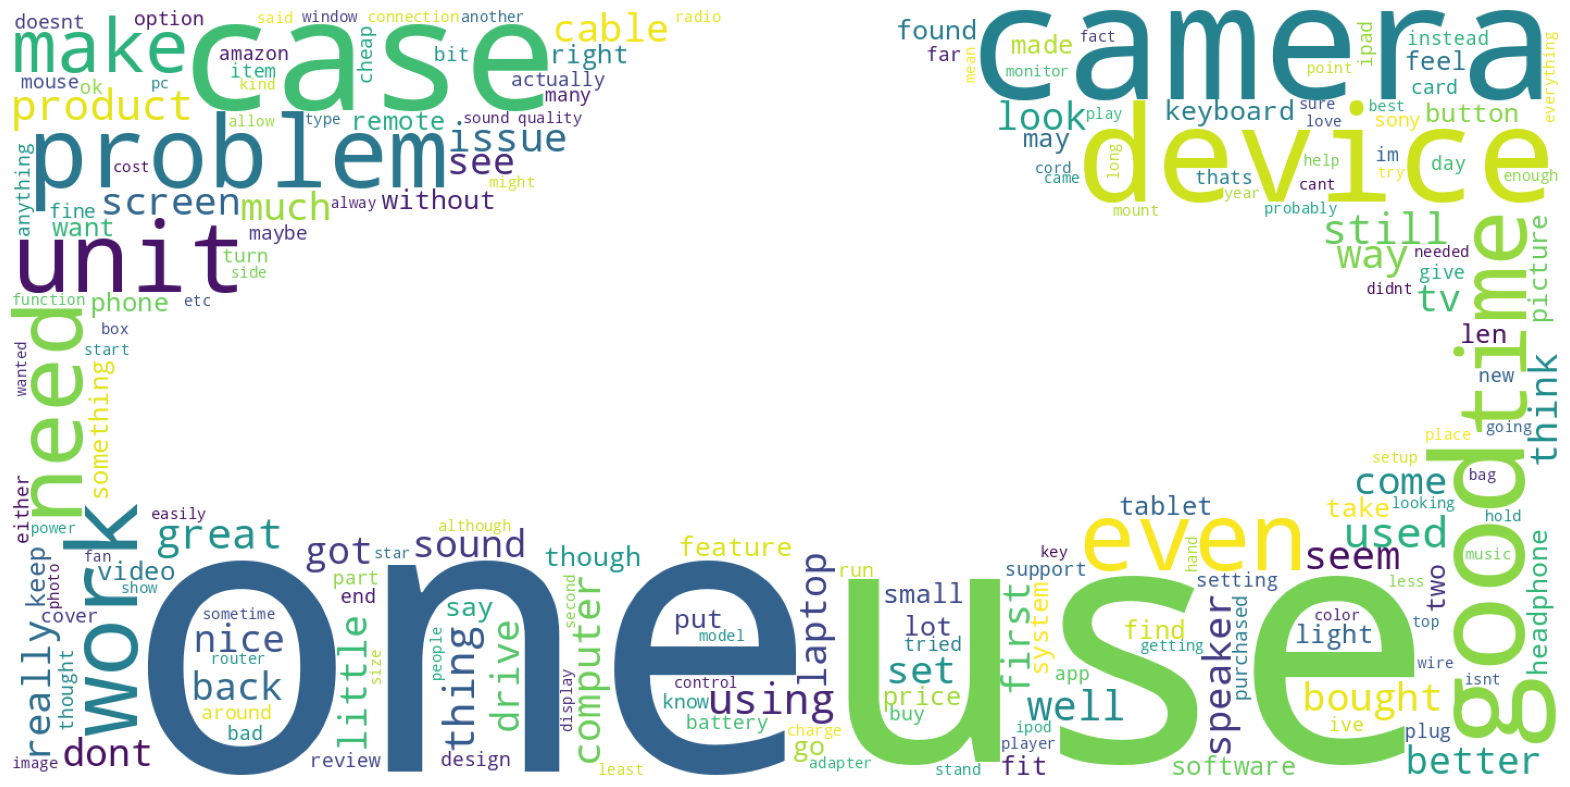

In [77]:
wc(neutral_data_overall_sentiment,"white")

In [82]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [84]:
# 8-Vektörize et
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [ ]:
# Classification Modelleme

Overall'e göre classification işlemi yapalım

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
df.overall=df.overall.astype("category")

In [87]:
x,y=df['reviewText'],df['sentimentOverall']

In [88]:
x.shape,y.shape

((400000,), (400000,))

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [90]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [91]:
x_train_dtm.shape,x_test_dtm.shape

((300000, 382066), (100000, 382066))

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [93]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [94]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [95]:
accuracy_score(y_test,b_predict)

0.83439

In [96]:
#Model oluşturduğumuzda CountVectorizer yapabilmek için bu alanın da modelle birlikte alınması gerekir.
vocabulary = vect.vocabulary_

In [98]:
import pickle
pickle.dump(model, open('NLP.pkl', 'wb'))
pickle.dump(vocabulary, open('vocabulary.pkl', 'wb'))

Bu Projede yaptıklarımızı kısaca özetlersek;
Veri kümesinin çekip NLP nin gerektirdikleri temizleme, lemmazation, tokenize ve vectörize işlemleri yapıp veriyi en iyi performansla algoritmaya vermek için hazırladık. Classification modelleme yapmadan önce en çok geçen pozitif negatif ve nötr kelimeleri içeren WordCloud oluşturduk. Akabinde 400000 lik verimizi modelleme için bir kısmını eğitmek bir kısmını test etmek için ayırdık. Yüzde 83lük doğruluk ile yeni gelen bir yorumun pozitif mi negatif mi nötr mü olduğu belirleyebiliriz.